In [2]:
import folium
import pandas as pd
import numpy as np

In [3]:
pd.set_option('mode.chained_assignment', None)

data = pd.read_csv('전국초중등학교위치표준데이터.csv',encoding='CP949')

# 1. 필요한 컬럼만 가져오기
data = data[['학교명','학교급구분','설립형태','소재지지번주소','위도','경도']]
data

# 2. 주소에서 -> 시도, 군구로 구분
addr = pd.DataFrame(data['소재지지번주소'].apply(lambda v: v.split()[:2]).tolist(),columns=('시도','군구'))
# addr[addr['시도'] == '%구'] # 이렇게는 안됨
addr[addr['시도'].str.endswith('군')] # 없음
addr[addr['시도'].str.endswith('구')] # 없음
addr[addr['군구'].str.endswith('도')] # 없음

# 3. '시도', '군구' 바꿀 데이터 확인
addr['시도'].unique()
# array(['경기도', '강원특별자치도', '경상북도', '전라남도', '전북특별자치도', '서울특별시', '충청남도',
#        '광주광역시', '울산광역시', '경상남도', '세종특별자치시', '대구광역시', '충청북도', '부산광역시',
#        '대전광역시', '제주특별자치도', '인천광역시', '경기', '김해시'], dtype=object)

addr[addr['시도'] == '경기'] ## 3324행
addr.iloc[3324] = ['경기도', '파주시']

addr['군구'].unique() # ok

# 3-2. data_draw_korea의 컬럼값이랑 맞춰줘야 함
    # 강원특별자치도 -> 강원도 / 김해시 -> 경상남도 / 전북특별자치도 -> 전라북도
addr.loc[addr['시도'] == '강원특별자치도', '시도'] = '강원도'
addr.loc[addr['시도'] == '전북특별자치도', '시도'] = '전라북도'
addr.loc[addr['시도'] == '김해시', '시도'] = '경상남도'
addr.loc[addr['시도'] == '세종특별자치시', '군구'] = '세종시'
# addr.loc[addr['군구'] == '남동구', '군구'] = '남구'


addr['시도군구'] = addr.apply(lambda v: v['시도'] + ' ' + v['군구'], axis=1)
addr['count'] = 0 # 모든 행의 count컬럼이 다 0으로 초기화

addr.head()


data_addr_group = pd.DataFrame(addr.groupby(['시도', '군구', '시도군구'], as_index=False).count())
data_addr_group

data_addr_group = data_addr_group.set_index('시도군구')
data_addr_group[data_addr_group['시도']=='인천광역시']

,시도,군구,count
시도군구,,,
인천광역시 강화군,인천광역시,강화군,37
인천광역시 계양구,인천광역시,계양구,53
인천광역시 남동구,인천광역시,남동구,77
인천광역시 동구,인천광역시,동구,15
인천광역시 미추홀구,인천광역시,미추홀구,49
인천광역시 부평구,인천광역시,부평구,82
인천광역시 서구,인천광역시,서구,98
인천광역시 연수구,인천광역시,연수구,68
인천광역시 옹진군,인천광역시,옹진군,22


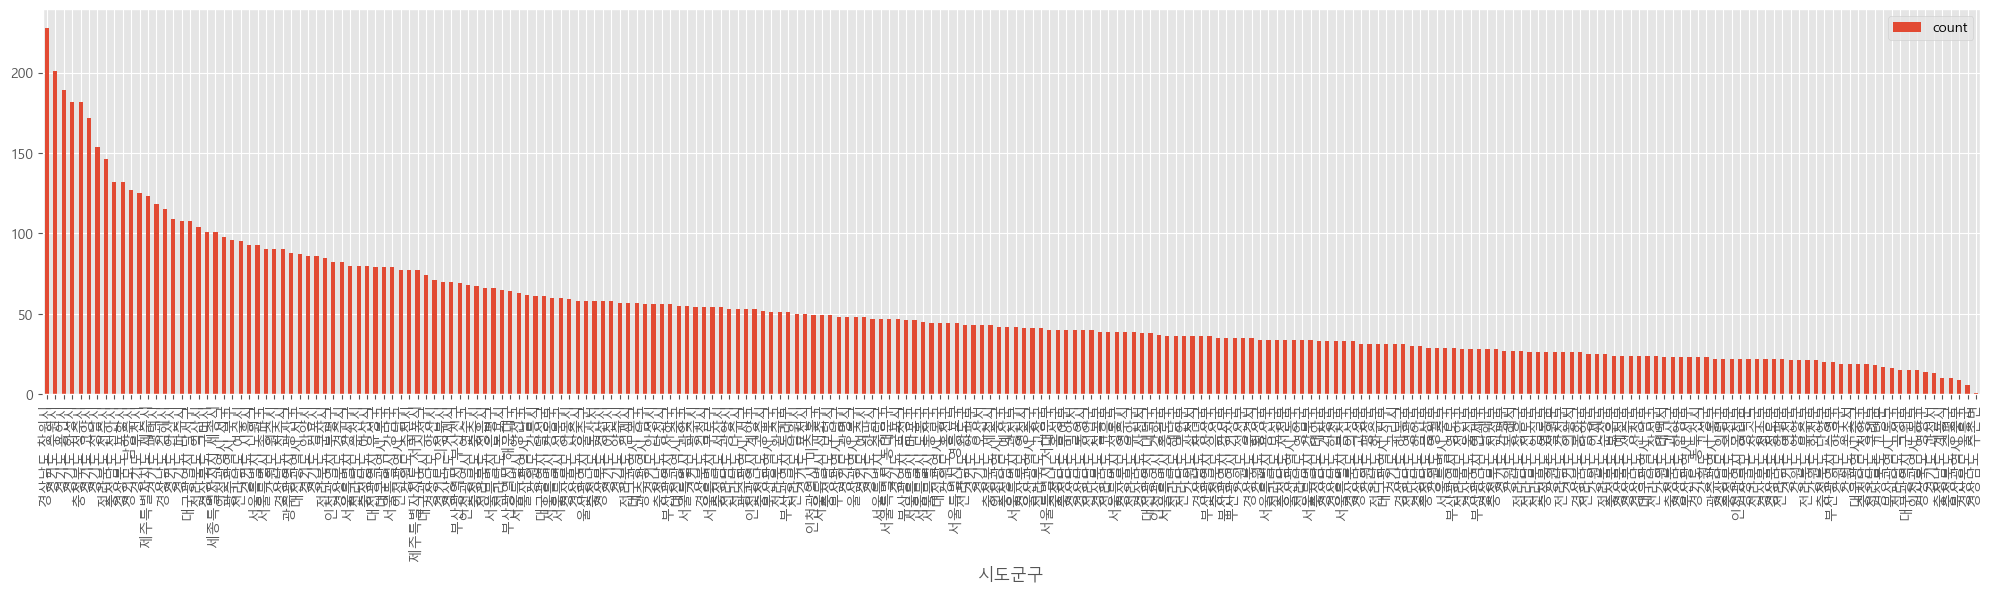

In [14]:
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
style.use('ggplot')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

# (1)행정구역별 초등학교 수에 대한 바 차트를 그리기
MC_ratio = data_addr_group[['count']]
MC_ratio = MC_ratio.sort_values('count', ascending = False)
plt.rcParams["figure.figsize"] = (25, 5)
MC_ratio.plot(kind = 'bar', rot = 90)
plt.show()

In [15]:
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]

,시도,군구,count
시도군구,,,
강원도 강릉시,강원도,강릉시,61
강원도 고성군,강원도,고성군,23
강원도 동해시,강원도,동해시,27
강원도 삼척시,강원도,삼척시,36
강원도 속초시,강원도,속초시,19
...,...,...,...
충청북도 제천시,충청북도,제천시,43
충청북도 증평군,충청북도,증평군,10
충청북도 진천군,충청북도,진천군,28


In [19]:
import os
path = os.getcwd() # 현재 사용 중인 폴더(디렉토리)의 경로를 구하여 path에 저장

data_draw_korea = pd.read_csv(path+'\\data_draw_korea.csv',index_col = 0, encoding = 'UTF-8', engine = 'python')
data_draw_korea.head()

data_draw_korea['시도군구'] = data_draw_korea.apply(lambda r: r['광역시도'] + ' ' + r['행정구역'], axis=1)
data_draw_korea = data_draw_korea.set_index('시도군구')

data_draw_korea
data_draw_korea_school = pd.merge(data_draw_korea,data_addr_group, how = 'outer',
                                             left_index = True, right_index = True)

data_draw_korea_school

data_draw_korea['광역시도'].unique()

# try1: blockmap함수 돌릴 때 아레 에러가 뜨므로 -> x,y,count값을 모두 정수형으로 바꿔줌
    # ValueError: Index contains duplicate entries, cannot reshape
    # mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)

# try2: 근데, NaN값때문에 정수형으로 안 바뀜
# data_draw_korea_school[data_draw_korea_school['x']]
nan_rows = data_draw_korea_school[data_draw_korea_school['x'].isna()] # 개많음
nan_rows

data_draw_korea_school = data_draw_korea_school.dropna(subset=['x'])
data_draw_korea_school = data_draw_korea_school.dropna(subset=['count'])
data_draw_korea_school['x'] = data_draw_korea_school['x'].astype(int)
data_draw_korea_school['y'] = data_draw_korea_school['y'].astype(int)
data_draw_korea_school['count'] = data_draw_korea_school['count'].astype(int)

data_draw_korea_school # 259 -> 226
data_draw_korea_school[data_draw_korea_school['시도']=='인천광역시']

,인구수,shortName,x,y,면적,광역시도,행정구역,시도,군구,count
시도군구,,,,,,,,,,
인천광역시 강화군,58296.0,인천강화,1,3,411.20,인천광역시,강화군,인천광역시,강화군,37
인천광역시 계양구,317785.0,인천계양,2,5,45.58,인천광역시,계양구,인천광역시,계양구,53
인천광역시 남구,388535.0,인천남구,2,7,24.47,인천광역시,남구,인천광역시,남구,77
인천광역시 동구,68950.0,인천동구,1,5,7.05,인천광역시,동구,인천광역시,동구,15
인천광역시 부평구,527153.0,인천부평,2,6,32.00,인천광역시,부평구,인천광역시,부평구,82
인천광역시 서구,477567.0,인천서구,1,4,137.05,인천광역시,서구,인천광역시,서구,98
인천광역시 연수구,299734.0,인천연수,1,8,33.76,인천광역시,연수구,인천광역시,연수구,68
인천광역시 옹진군,17735.0,인천옹진,0,8,164.30,인천광역시,옹진군,인천광역시,옹진군,22
인천광역시 중구,105029.0,인천중구,1,7,110.60,인천광역시,중구,인천광역시,중구,42


In [17]:
# 블록맵의 블록에 데이터를 매핑하고 색을 표시하여 블록맵을 그린 뒤 저장하는 함수를 정의
def draw_blockMap(blockedMap, targetData, title, color ):
    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(8, 13))
    plt.title(title)
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=color, edgecolor='#aaaaaa', linewidth=0.5)

    # 0. 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
    
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row['광역시도'].endswith('시') and not row['광역시도'].startswith('세종'):
            dispname = '{}\n{}'.format(row['광역시도'][:2], row['행정구역'][:-1])
            if len(row['행정구역']) <= 2:
                dispname += row['행정구역'][-1]
        else:
            dispname = row['행정구역'][:-1]

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
    
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis()
    #plt.gca().set_aspect(1)
    plt.axis('off')
    
    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    
    plt.savefig('.\\' + 'blockMap_' + targetData + '.png')

    plt.show()      

C:\Users\A\AppData\Local\Temp\ipykernel_11536\2768210598.py:48: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb = plt.colorbar(shrink=.1, aspect=10)


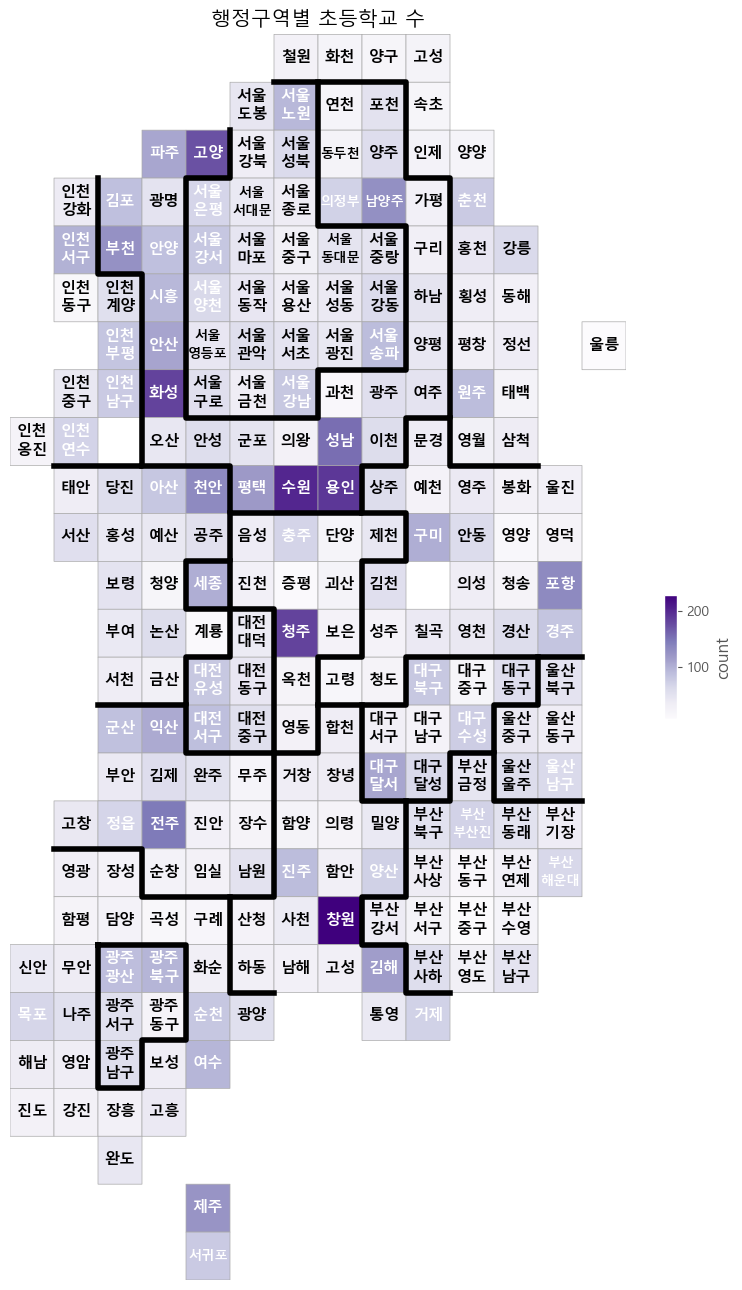

In [18]:
draw_blockMap(data_draw_korea_school, 'count', '행정구역별 초등학교 수', 'Purples')